In [1]:
!pip install super-gradients

In [2]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train,
    coco_detection_yolo_format_val
)
from super_gradients.training import models
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import (
    DetectionMetrics_050,
    DetectionMetrics_050_095
)
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback
from tqdm.auto import tqdm

import os
import requests
import zipfile
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import random
from PIL import Image
from tqdm import tqdm

The console stream is logged into /root/sg_logs/console.log


[2023-09-20 06:28:18] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-09-20 06:28:18] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-09-20 06:28:26] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-09-20 06:28:32] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-09-20 06:28:32] WARNING - export.py - Failed to import pytorch_quantization
[2023-09-20 06:28:32] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [3]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# this function make the predection and save in inference_result folder
def predict_and_save_images(input_path):
  model = models.get(
    model_name='yolo_nas_s',
    checkpoint_path='/content/drive/MyDrive/ckpt_best.pth',
    num_classes=5
)
  os.makedirs('inference_results/images/', exist_ok=True)
  ROOT_TEST = input_path
  all_images = os.listdir(ROOT_TEST)
  for image in tqdm(all_images, total=len(all_images)):
    image_path = os.path.join(ROOT_TEST, image)
    out = model.predict(image_path)
    out.save('/content/inference_results/images')
    os.rename(
        'inference_results/images/pred_0.jpg',
        os.path.join('/content/inference_results/images', image)
    )
  display_images('/content/inference_results/images') # call the display_images function to display the results

In [5]:
# this function display the results
def display_images(output_dir):
    image_files = os.listdir(output_dir)

    for image_file in image_files:
        image_path = os.path.join(output_dir, image_file)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.show()

Mounted at /content/drive


[2023-09-20 06:29:24] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/drive/MyDrive/ckpt_best.pth EMA checkpoint.
100%|██████████| 2/2 [00:05<00:00,  2.93s/it]


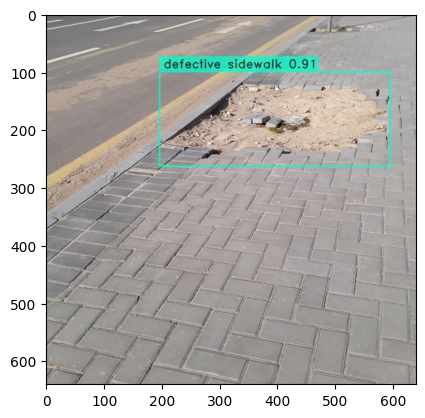

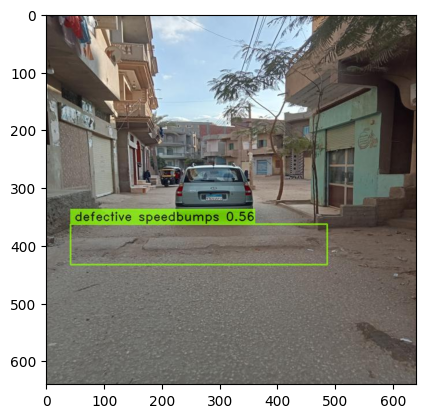

In [6]:
# put inference images folder path
predict_and_save_images('/content/drive/MyDrive/inference')